# Oberservations:
- Capomulin seems to perform the best overall as the cancer retreats during treatment and it boasts the highest survival rate.

-When looking at the tumor response graph, it appears the with the exception of Capomulin, all three of the drugs performed very similiarly.

-When looking at the survival rates, Infubinol performed the worst with only 36% of its population surviving. 

In [1]:
% matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics
import warnings
warnings.filterwarnings('ignore')

In [3]:
#read files
mousefile = 'mouse_drug_data.csv'
clinicaltrialfile = 'clinicaltrial_data.csv'

In [4]:
#use pandas to read files and make them into data frames
mousedata_df = pd.read_csv(mousefile)
mousedata_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [5]:
#use pandas to read clinical trial data
trialdata_df = pd.read_csv(clinicaltrialfile)
trialdata_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
total_data_df = pd.merge(mousedata_df, trialdata_df, on = 'Mouse ID')

In [7]:
total_data_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [8]:
plot_data = total_data_df[['Drug', 'Timepoint', 'Tumor Volume (mm3)']]
plot_data_mean = plot_data.groupby(['Drug', 'Timepoint']).mean()

In [9]:
#The main thing needed to plot, then gonna add the sem in
plot_data_stack = plot_data_mean.unstack(level= 0)
plot_data_stack.columns
cap = plot_data_stack['Tumor Volume (mm3)', 'Capomulin']
inf = plot_data_stack['Tumor Volume (mm3)', 'Infubinol']
ket = plot_data_stack['Tumor Volume (mm3)', 'Ketapril']
plac = plot_data_stack['Tumor Volume (mm3)', 'Placebo']

In [10]:
plot_df = pd.DataFrame({ 'Capomulin': cap,
                       'Infubinol': inf,
                       'Ketapril': ket,
                       'Placebo': plac})
plot_df

,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


# Tumor Response to Treatment

In [11]:
#groupby timepoint and drug
time_drug_df = total_data_df.groupby(['Drug','Timepoint'])

In [12]:
#trying to set new index to make analysis easier
newdf = total_data_df[['Drug', 'Timepoint', 'Tumor Volume (mm3)']]


In [13]:
tumorresponse =newdf.groupby(['Drug','Timepoint']).sem()



In [14]:
#replica of homework assignment

tumorplot = tumorresponse.unstack(level= 0)
                       
tumorplot
#tumorplot.columns
#tumorplot.index.get_level_values('Timepoint')

Tumor Volume (mm3)                                          \
Drug               Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   
Timepoint                                                              
0                   0.000000  0.000000  0.000000  0.000000  0.000000   
5                   0.448593  0.164505  0.235102  0.264819  0.202385   
10                  0.702684  0.236144  0.282346  0.357421  0.319415   
15                  0.838617  0.332053  0.357705  0.580268  0.444378   
20                  0.909731  0.359482  0.476210  0.726484  0.595260   
25                  0.881642  0.439356  0.550315  0.755413  0.813706   
30                  0.934460  0.490620  0.631061  0.934121  0.975496   
35                  1.052241  0.692248  0.984155  1.127867  1.013769   
40                  1.223608  0.708505  1.055220  1.158449  1.118567   
45                  1.223977  0.902358  1.144427  1.453186  1.416363   

                                                             
Drug        Placebo  Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                                    
0          0.000000  0.000000  0.000000  0.000000  0.000000  
5          0.218091  0.231708  0.482955  0.239862  0.188950  
10         0.402064  0.376195  0.720225  0.433678  0.263949  
15         0.614461  0.466109  0.770432  0.493261  0.370544  
20         0.839609  0.555181  0.786199  0.621889  0.533182  
25         1.034872  0.577401  0.746991  0.741922  0.602513  
30         1.218231  0.746045  0.864906  0.899548  0.800043  
35         1.287481  1.084929  0.967433  1.003186  0.881426  
40         1.370634  1.564779  1.128445  1.410435  0.998515  
45         1.351726  1.888586  1.226805  1.576556  1.003576

In [15]:
tumorplot.sort_index(inplace= True)

capsem = tumorplot['Tumor Volume (mm3)', 'Capomulin']
infsem = tumorplot['Tumor Volume (mm3)', 'Infubinol']
ketasem = tumorplot['Tumor Volume (mm3)', 'Ketapril']
placsem = tumorplot['Tumor Volume (mm3)', 'Placebo']

In [16]:
# SEMS for the desired drugs
tumresponsesemdf = pd.DataFrame ({'Capomulin': capsem,
              'Infubinol': infsem,
              'Ketapril': ketasem,
               'Placebo': placsem })

tumresponsesemdf
#x1 =tumresponsesemdf.index
#y1 = tumresponsesemdf['Capomulin']#, 'Infubinol' ,'Ketapril','Placebo' ]]


,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609
25,0.881642,0.550315,0.755413,1.034872
30,0.934460,0.631061,0.934121,1.218231
35,1.052241,0.984155,1.127867,1.287481
40,1.223608,1.055220,1.158449,1.370634


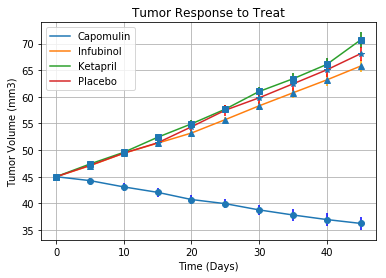

In [17]:
#Tumor Responsw to Treatment Graph!!
plot_df.plot()
plt.errorbar(tumresponsesemdf.index, plot_df['Capomulin'], yerr=tumresponsesemdf['Capomulin'] , fmt = 'o', ecolor= 'b')
plt.errorbar(tumresponsesemdf.index, plot_df['Infubinol'], yerr=tumresponsesemdf['Infubinol'], fmt = '^', ecolor= 'orange' )
plt.errorbar(tumresponsesemdf.index, plot_df['Ketapril'], yerr=tumresponsesemdf['Ketapril'], fmt = 's', ecolor= 'g' )
plt.errorbar(tumresponsesemdf.index, plot_df['Placebo'], yerr=tumresponsesemdf['Placebo'], fmt = '*', ecolor= 'r' )
plt.title('Tumor Response to Treat')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()

# Metastatic Response to Treatment


In [18]:
 # Store the Mean Met. Site Data Grouped by Drug and Timepoint 

meta_data_df = total_data_df[['Drug', 'Timepoint', 'Metastatic Sites']]

In [19]:
meta_mean = meta_data_df.groupby(['Drug', 'Timepoint']).mean()
meta_mean_stack = meta_mean.unstack(level= 0)

meta_mean_stack



Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   
25                0.818182  1.500000  1.277778  1.631579  1.500000  1.941176   
30                1.090909  1.937500  1.588235  2.055556  2.066667  2.266667   
35                1.181818  2.071429  1.666667  2.294118  2.266667  2.642857   
40                1.380952  2.357143  2.100000  2.733333  2.466667  3.166667   
45                1.476190  2.692308  2.111111  3.363636  2.538462  3.272727   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118  
25         1.357143  0.652174  1.157895  1.687500  
30         1.615385  0.782609  1.388889  1.933333  
35         2.300000  0.952381  1.562500  2.285714  
40         2.777778  1.100000  1.583333  2.785714  
45         2.571429  1.250000  1.727273  3.071429

In [20]:
capmetamean = meta_mean_stack['Metastatic Sites','Capomulin']
infmetmean = meta_mean_stack['Metastatic Sites','Infubinol']
ketmetmean = meta_mean_stack['Metastatic Sites','Ketapril']
placmetmean = meta_mean_stack['Metastatic Sites','Placebo']

In [21]:
meta_mean_df = pd.DataFrame({'Capomulin': capmetamean,
                            'Infubinol': infmetmean,
                            'Ketapril': ketmetmean,
                            'Placebo': placmetmean})
meta_mean_df

,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


In [22]:
#need to create dataframe for the errorbars
meta_sem = meta_data_df.groupby(['Drug', 'Timepoint']).sem()
meta_sem_stack = meta_sem.unstack(level= 0)


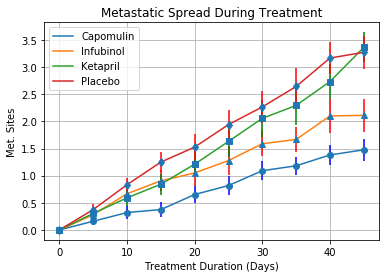

In [24]:
meta_mean_df.plot()
plt.errorbar(meta_sem_stack.index, meta_mean_df['Capomulin'], yerr= meta_sem_stack['Metastatic Sites','Capomulin'], fmt ='o', ecolor= 'b' )
plt.errorbar(meta_sem_stack.index, meta_mean_df['Infubinol'], yerr= meta_sem_stack['Metastatic Sites','Infubinol'], fmt = '^', ecolor= 'r' )
plt.errorbar(meta_sem_stack.index, meta_mean_df['Ketapril'], yerr= meta_sem_stack['Metastatic Sites','Ketapril'], fmt = 's', ecolor= 'g' )
plt.errorbar(meta_sem_stack.index, meta_mean_df['Placebo'], yerr= meta_sem_stack['Metastatic Sites','Placebo'] , fmt = 'd', ecolor= 'r')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.title('Metastatic Spread During Treatment')
plt.grid()

# Survival Rates

In [25]:
mice_data = total_data_df[['Mouse ID', 'Timepoint', 'Drug']]

In [26]:
#a = mice_data.set_index('Mouse ID').groupby(['Timepoint', 'Drug'])

In [27]:
store = mice_data.groupby(['Drug','Timepoint']).count()
#store.set_index('Mouse ID',inplace= True)

In [28]:
store.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [29]:
mouse_df = store.unstack(level= 0)

In [30]:
capmouse = mouse_df['Mouse ID', 'Capomulin']
infmouse = mouse_df['Mouse ID', 'Infubinol']
ketmouse = mouse_df['Mouse ID', 'Ketapril']
placmouse = mouse_df['Mouse ID', 'Placebo']

In [31]:
drug_mouse_df = pd.DataFrame({'Capomulin': capmouse *4,
                             'Infubinol': infmouse *4,
                             'Ketapril': ketmouse *4 ,
                             'Placebo': placmouse *4})
drug_mouse_df

,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100,100,100,100
5,100,100,92,96
10,100,84,88,96
15,96,84,76,80
20,92,80,76,76
25,88,72,76,68
30,88,68,72,60
35,88,48,68,56
40,84,40,60,48


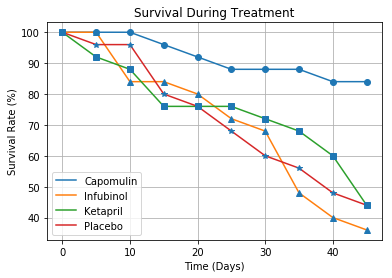

In [43]:
drug_mouse_df.plot()
plt.errorbar(drug_mouse_df.index, drug_mouse_df['Capomulin'], fmt = 'o', ecolor= 'b')
plt.errorbar(drug_mouse_df.index, drug_mouse_df['Infubinol'], fmt = '^' , ecolor= 'o')
plt.errorbar(drug_mouse_df.index, drug_mouse_df['Ketapril'], fmt = 's', ecolor= 'g')
plt.errorbar(drug_mouse_df.index, drug_mouse_df['Placebo'], fmt = '*', ecolor= 'r')
plt.title('Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.grid()

# Summary Bar Graph

In [59]:
summary = total_data_df[['Drug', 'Timepoint', 'Tumor Volume (mm3)']]
summarygroup = summary.groupby(['Drug', 'Timepoint']).mean()
summarystack = summarygroup.unstack(level= 0)
summarystack

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   
25                 39.939528  54.287674  55.715252  57.678982  56.731968   
30                 38.769339  56.769517  58.299397  60.994507  59.559509   
35                 37.816839  58.827548  60.742461  63.371686  62.685087   
40                 36.958001  61.467895  63.162824  66.068580  65.600754   
45                 36.236114  64.132421  65.755562  70.662958  69.265506   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334  
25         57.482574  55.504138  38.974300  56.166123  55.432935  
30         59.809063  58.196374  38.703137  59.826738  57.713531  
35         62.420615  60.350199  37.451996  62.440699  60.089372  
40         65.052675  63.045537  36.574081  65.356386  62.916692  
45         68.084082  66.258529  34.955595  68.438310  65.960888

In [72]:
sumzero = summarystack.iloc[0] 
sumfinal = summarystack.iloc[9]

In [74]:
sumchange = (sumfinal-sumzero)/sumzero

In [78]:
sumchange *100

                    Drug     
Tumor Volume (mm3)  Capomulin   -19.475303
                    Ceftamin     42.516492
                    Infubinol    46.123472
                    Ketapril     57.028795
                    Naftisol     53.923347
                    Placebo      51.297960
                    Propriva     47.241175
                    Ramicane    -22.320900
                    Stelasyn     52.085134
                    Zoniferol    46.579751
dtype: float64

In [130]:
sumperchnge =(sumchange *100)


In [114]:
summarychangedf = sumperchnge.to_frame()

Text(0, 0.5, '% Change in Tumor Size')

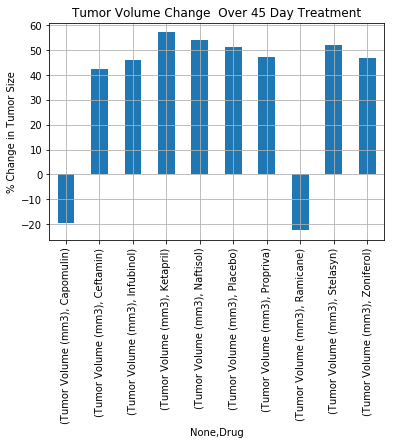

In [131]:
summarychangedf.plot(kind = 'bar',legend= False, )
plt.grid()
plt.title("Tumor Volume Change  Over 45 Day Treatment")
plt.ylabel("% Change in Tumor Size")
